In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from wordcloud import WordCloud

In [2]:
# 1 load the dataset
df = pd.read_csv('amazon.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB


<Axes: >

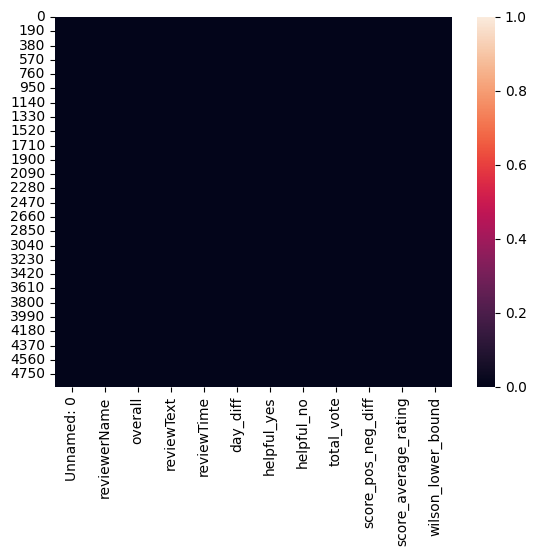

In [4]:
sns.heatmap(df.isnull())

In [5]:
# data pre-processsing and cleaning

df.isnull().sum()


Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [6]:
df.drop(columns=df.columns[0],inplace=True) # removing index clm
df['reviewTime'] = pd.to_datetime(df['reviewTime'],format="%d-%m-%Y") #converting into date time
df = df[df['reviewerName'].str.match(r'^[A-Za-z]', na=False)] #removing garbage reveiws


In [7]:
df.isna().sum()

reviewerName            0
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [8]:
df=df.dropna()
df.count()

reviewerName            4895
overall                 4895
reviewText              4895
reviewTime              4895
day_diff                4895
helpful_yes             4895
helpful_no              4895
total_vote              4895
score_pos_neg_diff      4895
score_average_rating    4895
wilson_lower_bound      4895
dtype: int64

In [9]:
df.head(10)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
13,"A4Q96 ""Gadget Lover""",5,Solid SDHC card that is fast (at reading and w...,2013-11-21,382,0,0,0,0,0.0,0.0
14,"Aaron ""Aaron""",5,Heard that the card's write speed is insuffici...,2014-02-17,294,0,0,0,0,0.0,0.0
15,"Aaron ""Aaron""",5,I bought this to use with my go pro hero 3 bla...,2013-04-01,616,0,0,0,0,0.0,0.0
16,Aaron Alvarez,5,got this because i had a 2 GB one that filled ...,2014-02-03,308,0,0,0,0,0.0,0.0
17,Aaron F. Virginie,5,Class 10 Speed Rating for Seamless Full HD Vid...,2013-04-07,610,0,1,1,-1,0.0,0.0
18,Aaron Graves,5,The read and write speeds are better than the ...,2014-02-05,306,0,0,0,0,0.0,0.0
19,Aaron,5,This works with the NL1520. No video stutteri...,2014-07-01,160,0,0,0,0,0.0,0.0
20,Aaron,5,Works as expected. High transfer speed. Nice...,2013-10-27,407,0,0,0,0,0.0,0.0
21,Aaron,5,Works great in a Samsung Galaxy S3. Formatted...,2013-12-29,344,0,0,0,0,0.0,0.0
22,Aaron Madden,5,SanDisk never disappoints. As always SanDisk p...,2013-05-11,576,0,0,0,0,0.0,0.0


In [10]:
df.duplicated().sum()
# end of pre-processing and cleaning

np.int64(0)

In [11]:
# polarity function
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [12]:

df['sentiment'] = df['reviewText'].apply(get_sentiment)
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

In [13]:
df['sentiment'].describe()


count    4895.000000
mean        0.279485
std         0.263247
min        -1.000000
25%         0.100000
50%         0.251010
75%         0.439444
max         1.000000
Name: sentiment, dtype: float64

In [14]:
# Set seaborn dark grid style
sns.set_style('darkgrid')
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
palette = sns.color_palette('rocket',3)

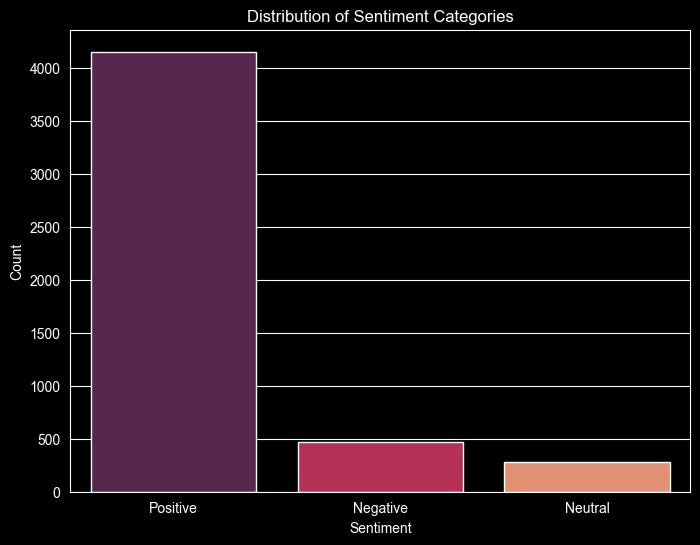

In [15]:
#count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette=palette,hue='sentiment_category',legend=False)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


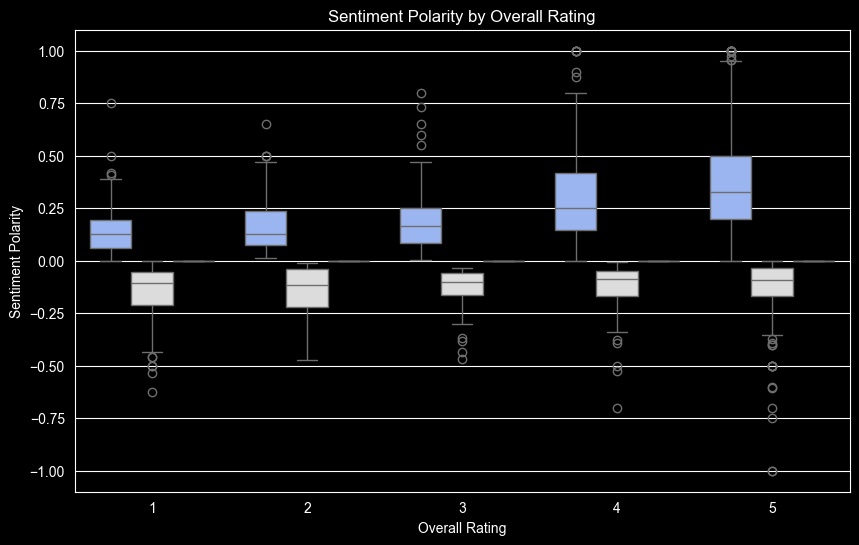

In [16]:
# Plot sentiment polarity by overall rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='overall', y='sentiment', data=df, palette='coolwarm',hue='sentiment_category',legend=False)
plt.title('Sentiment Polarity by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

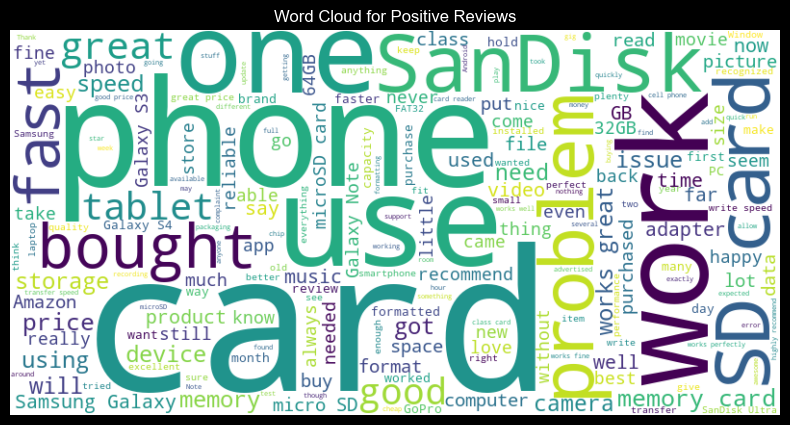

In [17]:
#Creating positive word cloud
positive_reviews = ' '.join(df[df['sentiment_category'] == 'Positive']['reviewText'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


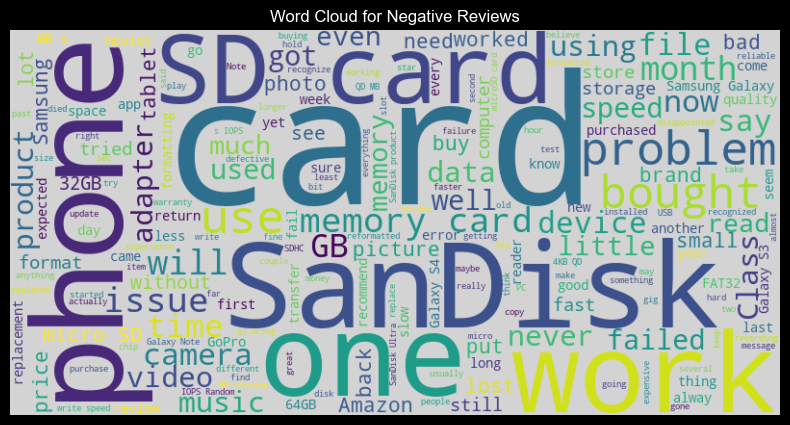

In [18]:
# Display negative word cloud
negative_reviews = ' '.join(df[df['sentiment_category'] == 'Negative']['reviewText'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='lightgrey').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

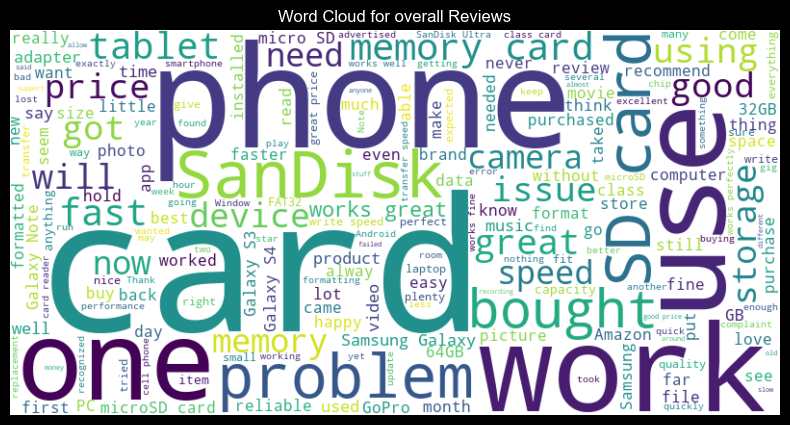

In [19]:
# overall word cloud
dash = ' '.join(df['reviewText'])
wordcloud_overall = WordCloud(width=800, height=400, background_color='white').generate(dash)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_overall, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for overall Reviews')
plt.show()

In [20]:
# df.to_csv('end-dataset.csv', index=False)

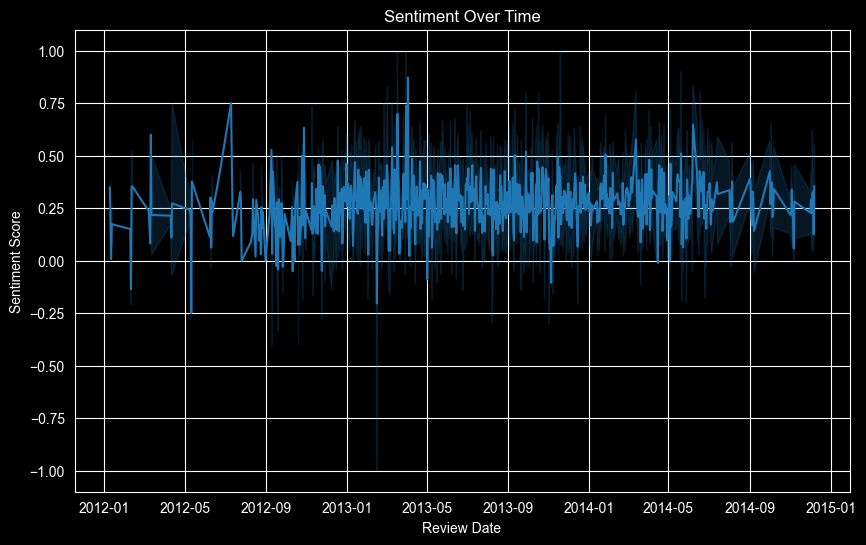

In [21]:
# sentiment vs time graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='reviewTime', y='sentiment', data=df)
plt.title('Sentiment Over Time')
plt.xlabel('Review Date')
plt.ylabel('Sentiment Score')
plt.show()

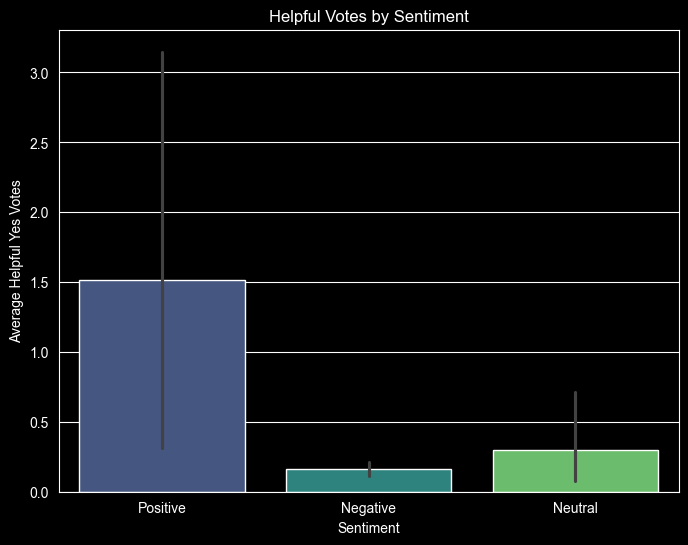

In [22]:
# helpful votes 
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_category', y='helpful_yes', data=df, palette='viridis',hue='sentiment_category',legend=False)
plt.title('Helpful Votes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Helpful Yes Votes')
plt.show()

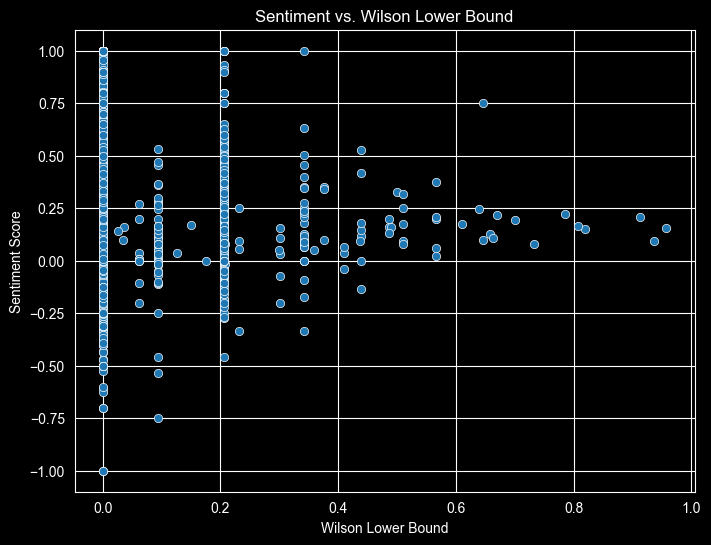

In [23]:
# Sentiment vs. Calculated Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='wilson_lower_bound', y='sentiment', data=df)
plt.title('Sentiment vs. Wilson Lower Bound')
plt.xlabel('Wilson Lower Bound')
plt.ylabel('Sentiment Score')
plt.show()


In [24]:
earliest_date = df['reviewTime'].min()
df['days_since_first_review'] = (df['reviewTime'] - earliest_date).dt.days
df['sentiment_num'] = df['sentiment_category'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

In [25]:
df['review_length'] = df['reviewText'].apply(len)
# df.to_csv("check.csv")

In [26]:
numerical_cols = [
    'days_since_first_review',
    'day_diff',
    'helpful_yes',
    'helpful_no',
    'total_vote',
    'score_pos_neg_diff',
    'score_average_rating',
    'wilson_lower_bound',
    'sentiment',
    'sentiment_num',
    'review_length'
]
df_clean = df[numerical_cols].dropna()
correlation_matrix = df_clean.corr()

# correlation_matrix

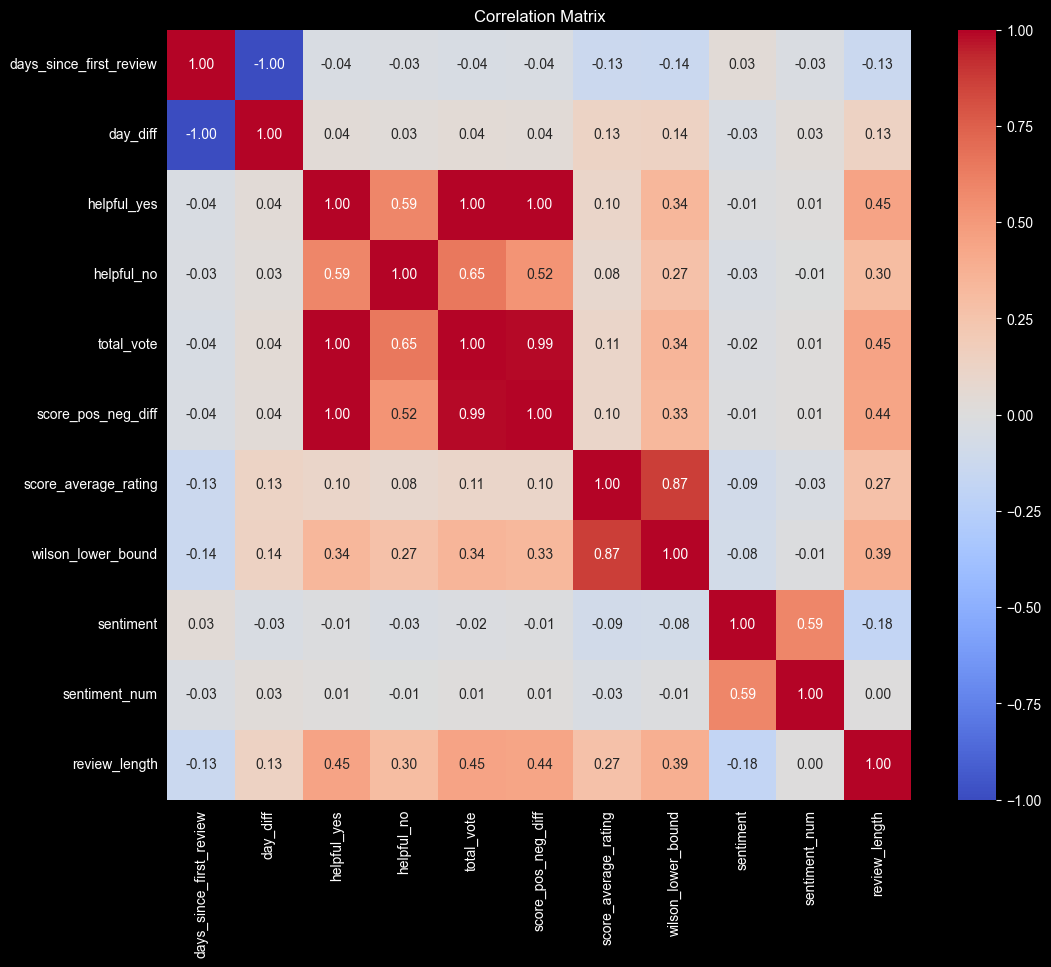

In [27]:
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()